In [115]:
import matplotlib.pyplot as plt
import numpy as np
import marvin
from marvin.tools import Maps

from marvin.tools import Cube

from marvin.tools import ModelCube

from marvin.tools import Image

In [116]:
maps = Maps('8131-9101')
cube = Cube('8131-9101')
modelcube = ModelCube(mangaid='1-604748')
image = Image('8131-9101')

(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:title={'center':'Emission line Gaussian flux: H-beta 4862'}, xlabel='spaxel', ylabel='spaxel'>)

[WARNING]: Warning: converting a masked element to nan. (UserWarning)


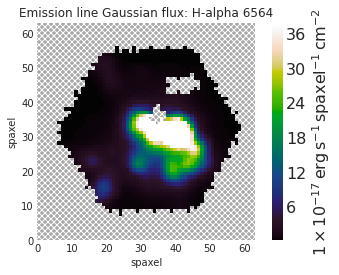

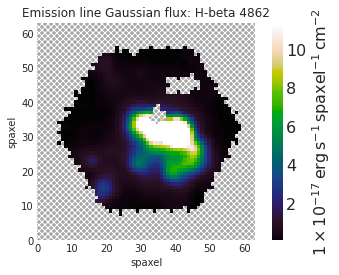

In [117]:
ha = maps.emline_gflux_ha_6564
hb = maps.emline_gflux_hb_4862
ha.plot()
hb.plot()

[WARNING]: invalid value encountered in multiply (RuntimeWarning)


(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:xlabel='spaxel', ylabel='spaxel'>)

[WARNING]: Warning: converting a masked element to nan. (UserWarning)


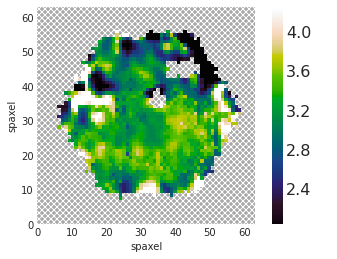

In [118]:
ha_hb = ha/hb
ha_hb.plot()

(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:title={'center':'Emission line Gaussian flux: H-gamma 4341'}, xlabel='spaxel', ylabel='spaxel'>)

[WARNING]: Warning: converting a masked element to nan. (UserWarning)


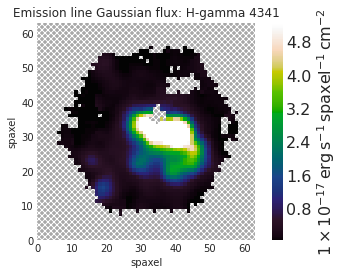

In [119]:
hy = maps.emline_gflux_hgam_4341
hy.plot()

[WARNING]: invalid value encountered in multiply (RuntimeWarning)


(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:xlabel='spaxel', ylabel='spaxel'>)

[WARNING]: Warning: converting a masked element to nan. (UserWarning)


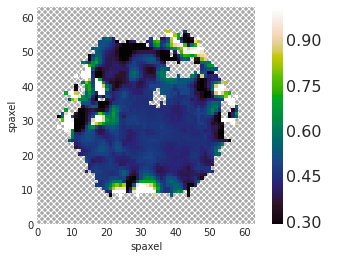

In [120]:
hy_hb = hy/hb
hy_hb.plot()

In [121]:
ha_hb.value[30]

array([       nan,        nan,        nan,        nan,        nan,
              nan,        nan, 2.77273912, 2.88412269, 3.1316124 ,
       3.3999823 , 3.16296774, 2.65598961, 2.46711798, 2.68475225,
       3.19652759, 3.87234647, 4.58645802, 4.09731074, 3.88377815,
       3.48787869, 3.42938631, 3.46987229, 3.10862717, 3.24973901,
       3.1015637 , 3.16801472, 3.19051025, 3.18650777, 3.24622057,
       2.96856243, 3.00193224, 3.11073445, 3.22881242, 3.22922442,
       3.16640502, 3.16104508, 3.36483413, 3.65098133, 3.71635037,
       3.71883157, 3.77285779, 3.74080365, 3.68488941, 3.56736983,
       3.66398024, 3.68314146, 3.33876851, 3.43113473, 3.64813588,
       3.37505225, 3.83590835, 3.33351237, 3.48716786, 4.00774154,
       3.89894409, 3.75450263, 4.14635097,        nan,        nan,
              nan,        nan,        nan,        nan])

In [122]:
radius = maps.spx_ellcoo_elliptical_radius

(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:title={'center':'Elliptical coordinates: Elliptical radius'}, xlabel='spaxel', ylabel='spaxel'>)

[WARNING]: Warning: converting a masked element to nan. (UserWarning)


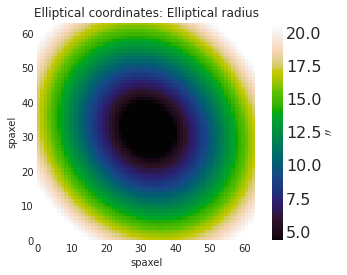

In [123]:
radius.plot()

In [124]:
radius.value[30]

array([17.5865 , 17.0436 , 16.5007 , 15.958  , 15.4153 , 14.8727 ,
       14.3302 , 13.7878 , 13.2455 , 12.7034 , 12.1615 , 11.6197 ,
       11.0781 , 10.5368 ,  9.99576,  9.45505,  8.91473,  8.37487,
        7.83557,  7.29697,  6.75921,  6.22252,  5.6872 ,  5.15369,
        4.6226 ,  4.09488,  3.57202,  3.05652,  2.55283,  2.06961,
        1.62522,  1.26136,  1.06416,  1.12495,  1.41077,  1.81844,
        2.2836 ,  2.77753,  3.28727,  3.80648,  4.33176,  4.86114,
        5.39341,  5.9278 ,  6.46377,  7.00097,  7.53913,  8.07806,
        8.61762,  9.15769,  9.69819, 10.2391 , 10.7802 , 11.3217 ,
       11.8633 , 12.4052 , 12.9472 , 13.4894 , 14.0317 , 14.5741 ,
       15.1166 , 15.6593 , 16.202  , 16.7448 ])

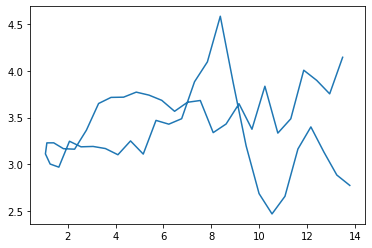

In [125]:
plt.plot(radius.value[30],ha_hb.value[30])

In [126]:
maps.datamodel.spx_ellcoo_r_h_kpc.description

'Elliptical polar coordinates of each spaxel from the galaxy center. Channel = R/(h/kpc).'

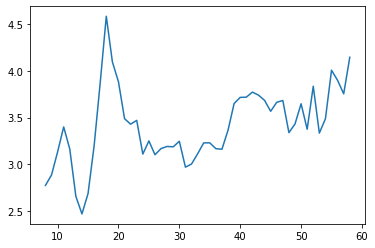

In [127]:
x_axis = np.linspace(1,64,64)
plt.plot(x_axis,ha_hb.value[30])

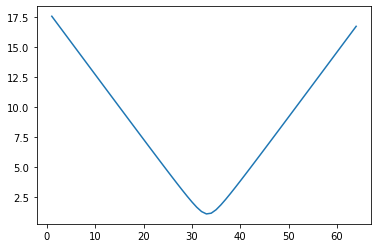

In [128]:
plt.plot(x_axis,radius.value[30])

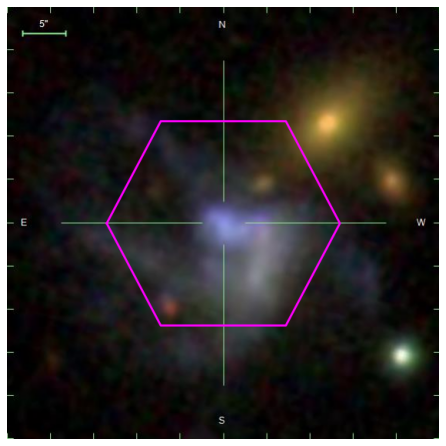

In [129]:
image.plot()

In [130]:
maps.datamodel.emline_ganr_ha_6564.description

'Amplitude Over Noise of the fitted Gaussian emission lines. Channel = H-alpha 6564.'

[WARNING]: divide by zero encountered in true_divide (RuntimeWarning)
[WARNING]: invalid value encountered in multiply (RuntimeWarning)
[WARNING]: invalid value encountered in true_divide (RuntimeWarning)
[WARNING]: divide by zero encountered in power (RuntimeWarning)
[WARNING]: divide by zero encountered in log10 (RuntimeWarning)
[WARNING]: invalid value encountered in log10 (RuntimeWarning)
[WARNING]: Warning: converting a masked element to nan. (UserWarning)


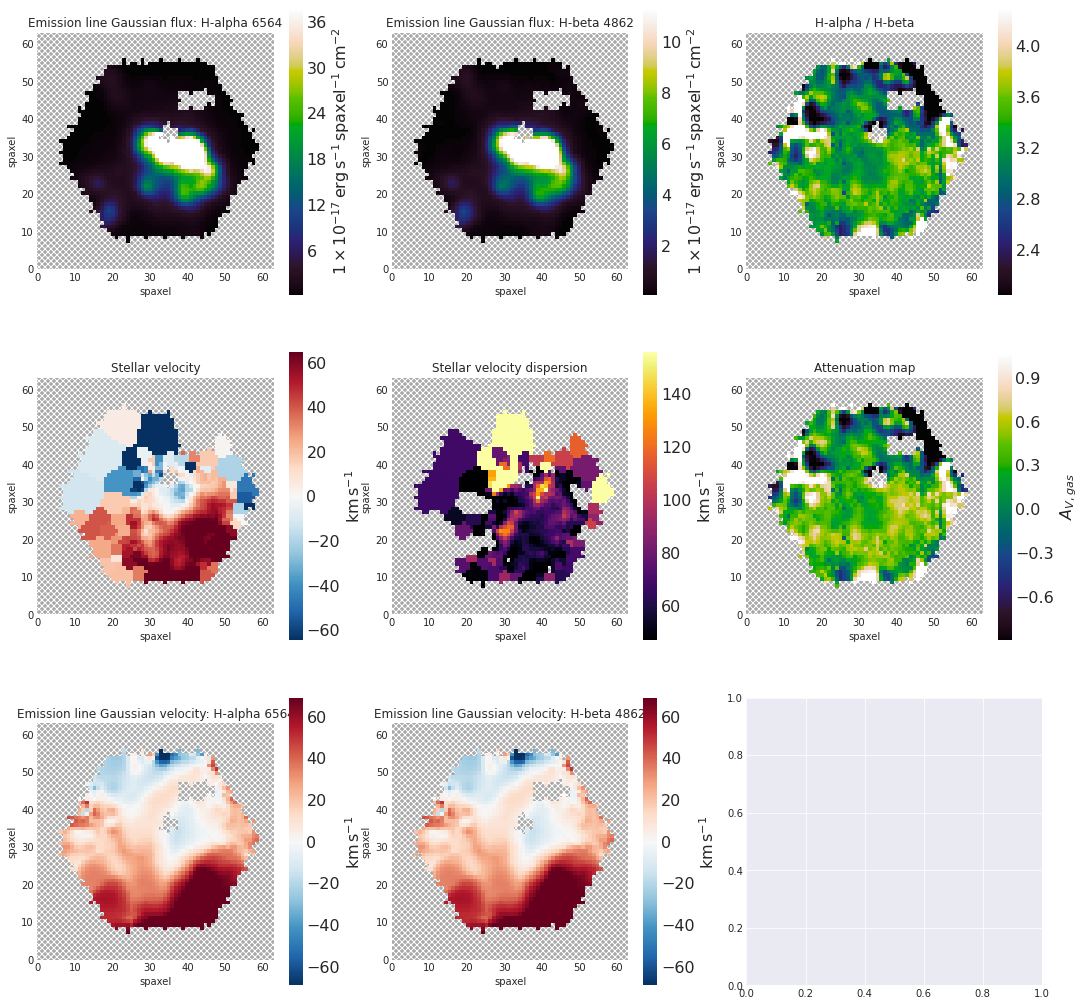

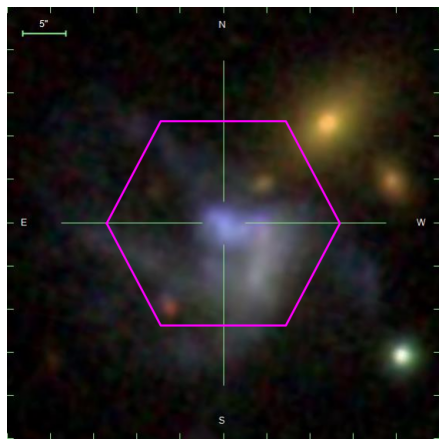

In [142]:
log_ha_hb = ha / hb
stvel = maps.stellar_vel
stsig = maps.stellar_sigma
stsig_corr = stsig.inst_sigma_correction()
A_V_gas = 1.97*np.log10(ha_hb/2.87)*3.1
gvel_ha = maps.emline_gvel_ha_6564
gvel_hb = maps.emline_gvel_hb_4862

with plt.style.context('seaborn-darkgrid'):
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 18))
    ha.plot(fig=fig, ax=axes[0, 0])
    log_ha_hb.plot(fig=fig, ax=axes[0, 2], title="H-alpha / H-beta", snr_min=None)
    stvel.plot(fig=fig, ax=axes[1, 0])
    stsig_corr.plot(fig=fig, ax=axes[1, 1])
    hb.plot(fig=fig,ax=axes[0,1])
    A_V_gas.plot(fig=fig,ax=axes[1,2],title="Attenuation map", snr_min=None,cblabel='$A_{V,gas}$')
    gvel_ha.plot(fig=fig,ax=axes[2,0])
    gvel_hb.plot(fig=fig,ax=axes[2,1])
    image.plot(fig=fig,ax=axes[2,2])

'Gaussian profile velocity for emission lines. Channel = H-alpha 6564.'